In [140]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [141]:
df = pd.read_csv('ETH_HUNT_transactions.csv')
df.drop(0, inplace = True)

In [142]:
df['block_timestamp'] = pd.to_datetime(df['block_timestamp'])
df['date_only'] = df['block_timestamp'].dt.date

In [143]:
wa = df[['trx_initiator', 'date_only', 'HUNT_in($)', 'HUNT_out($)']]
wa['HUNT_in($)'].fillna(0, inplace = True)
wa['HUNT_out($)'].fillna(0,inplace = True)
wa['HUNT_out($)'] = wa['HUNT_out($)'].apply(lambda x: -x)
wa['HUNT_total($)'] = wa['HUNT_out($)'].add(wa['HUNT_in($)'])

In [144]:
wa.drop(columns=['HUNT_out($)','HUNT_in($)'], axis=1, inplace=True)

In [145]:
l = []

unique_initiators = set()
sum_dict = {}

for i, row in wa.iterrows():
    initiator = row['trx_initiator']
    amount = row['HUNT_total($)']
    
    if initiator in unique_initiators:
        if initiator in sum_dict:
            sum_dict[initiator] += amount
        else:
            sum_dict[initiator] = amount
        
        if sum_dict[initiator] > 0:
            l.append(0)
        else:
            l.append(-1)
            sum_dict[initiator] = 0
            unique_initiators.remove(initiator)
    else:
        unique_initiators.add(initiator)
        l.append(1)

In [146]:
total = []

for i in range(len(l)):
    if i == 0:
        total.append(l[i])
    else:
        total.append(l[i] + total[i-1])

In [147]:
wa['unique_wallets'] = total

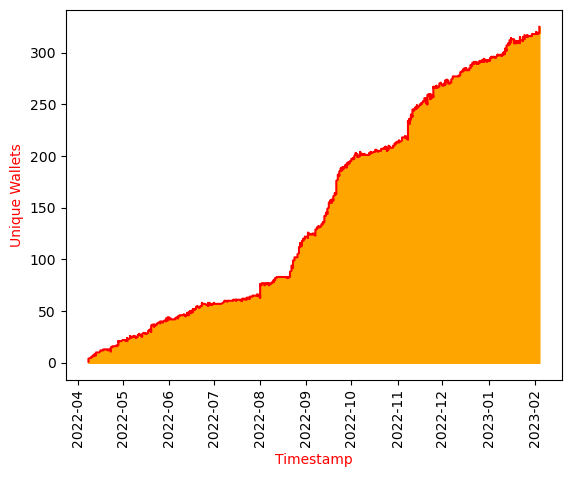

In [148]:
x = wa['date_only']
y = wa['unique_wallets']

plt.fill_between(x, y, color='orange')
plt.plot(x, y, color = 'r')
plt.xlabel('Timestamp', color = 'r')
plt.ylabel('Unique Wallets', color = 'r')
plt.xticks(rotation=90)
plt.show()